262/262 [==============================] - 0s 1ms/step
Confusion matrix:
[[ 884    3   70   11]
 [   1 1347  501  109]
 [  22  130 3119  163]
 [   0   24  140 1842]]

Classification report:
              precision    recall  f1-score   support

         1-1       0.97      0.91      0.94       968
         1-2       0.90      0.69      0.78      1958
         2-1       0.81      0.91      0.86      3434
         2-2       0.87      0.92      0.89      2006

    accuracy                           0.86      8366
   macro avg       0.89      0.86      0.87      8366
weighted avg       0.86      0.86      0.86      8366



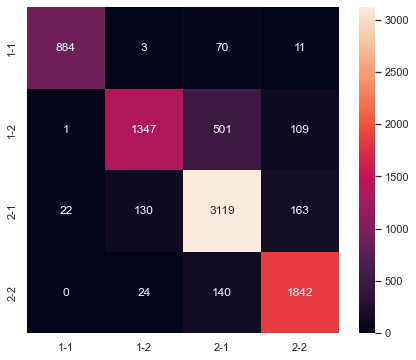

Classification Report


ValueError: Mix of label input types (string and number)

In [4]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取 HDF5 模型
model = keras.models.load_model('pose017.hdf5')

# 讀取測試數據
test_data = np.loadtxt('pose10 copy.csv', delimiter=',')
x_test, y_test = test_data[:, 1:], test_data[:, 0].astype(int)

# 進行預測
y_pred = np.argmax(model.predict(x_test), axis=-1)

# 計算混淆矩陣和分類報告
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 打印混淆矩陣和分類報告
print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(report)

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    sns.set(font_scale=1)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

print_confusion_matrix(y_test, y_pred)


262/262 [==============================] - 0s 1ms/step
Confusion matrix:
[[ 884    3   70   11]
 [   1 1347  501  109]
 [  22  130 3119  163]
 [   0   24  140 1842]]

Classification report:
              precision    recall  f1-score   support

 1-1.2-1.3-1       0.97      0.91      0.94       968
         1-2       0.90      0.69      0.78      1958
         2-1       0.81      0.91      0.86      3434
         2-2       0.87      0.92      0.89      2006

    accuracy                           0.86      8366
   macro avg       0.89      0.86      0.87      8366
weighted avg       0.86      0.86      0.86      8366



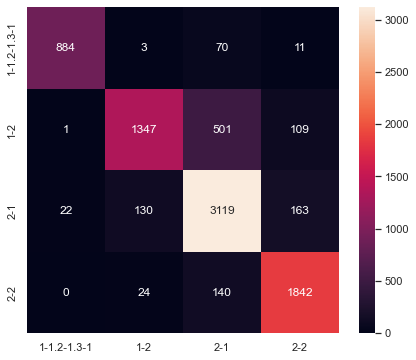

Classification Report


ValueError: Mix of label input types (string and number)

In [6]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取 HDF5 模型
model = keras.models.load_model('pose017.hdf5')

# 讀取測試數據
test_data = np.loadtxt('pose10 copy.csv', delimiter=',')
x_test, y_test = test_data[:, 1:], test_data[:, 0].astype(int)

# 定義類別對應的轉換字典
class_mapping = {
    0: '1-1.2-1.3-1',
    1: '1-2',
    2: '2-1',
    3: '2-2'
}

# 進行預測
y_pred = np.argmax(model.predict(x_test), axis=-1)

# 將預測結果轉換為對應的類別
y_test_mapped = [class_mapping[label] for label in y_test]
y_pred_mapped = [class_mapping[label] for label in y_pred]

# 計算混淆矩陣和分類報告
cm = confusion_matrix(y_test_mapped, y_pred_mapped)
report = classification_report(y_test_mapped, y_pred_mapped)

# 打印混淆矩陣和分類報告
print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(report)

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    sns.set(font_scale=1)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

print_confusion_matrix(y_test_mapped, y_pred_mapped)
